<h1 align='center'><strong>
Observation of the Effect of Particle Component Analysis on Efficiency of Logistic Regression in Prediction of Heart Failure Risk

<h2 align='center'><strong>
Import of Necessary Libraries, Modules and Functions
</h2>

In [39]:
import numpy as np                  # For Array Processing
import pandas as pd                 # For Data Import and Manipultion
import seaborn as sns               # For Statistical Data Visualization
import matplotlib.pyplot as plt     # For General Data Visualization
import matplotlib as mpl            # For General Data Visualizatiomn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pycaret.classification import compare_models,setup
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

In [2]:
mpl.rcParams['font.family'] = 'Times New Roman'

<h2 align='center'><strong>
Data Import
</h2>

<strong>Link to Dataset: <link>https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction</Link>

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h2 align='center'><strong>
Data Presentation
</h2>

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


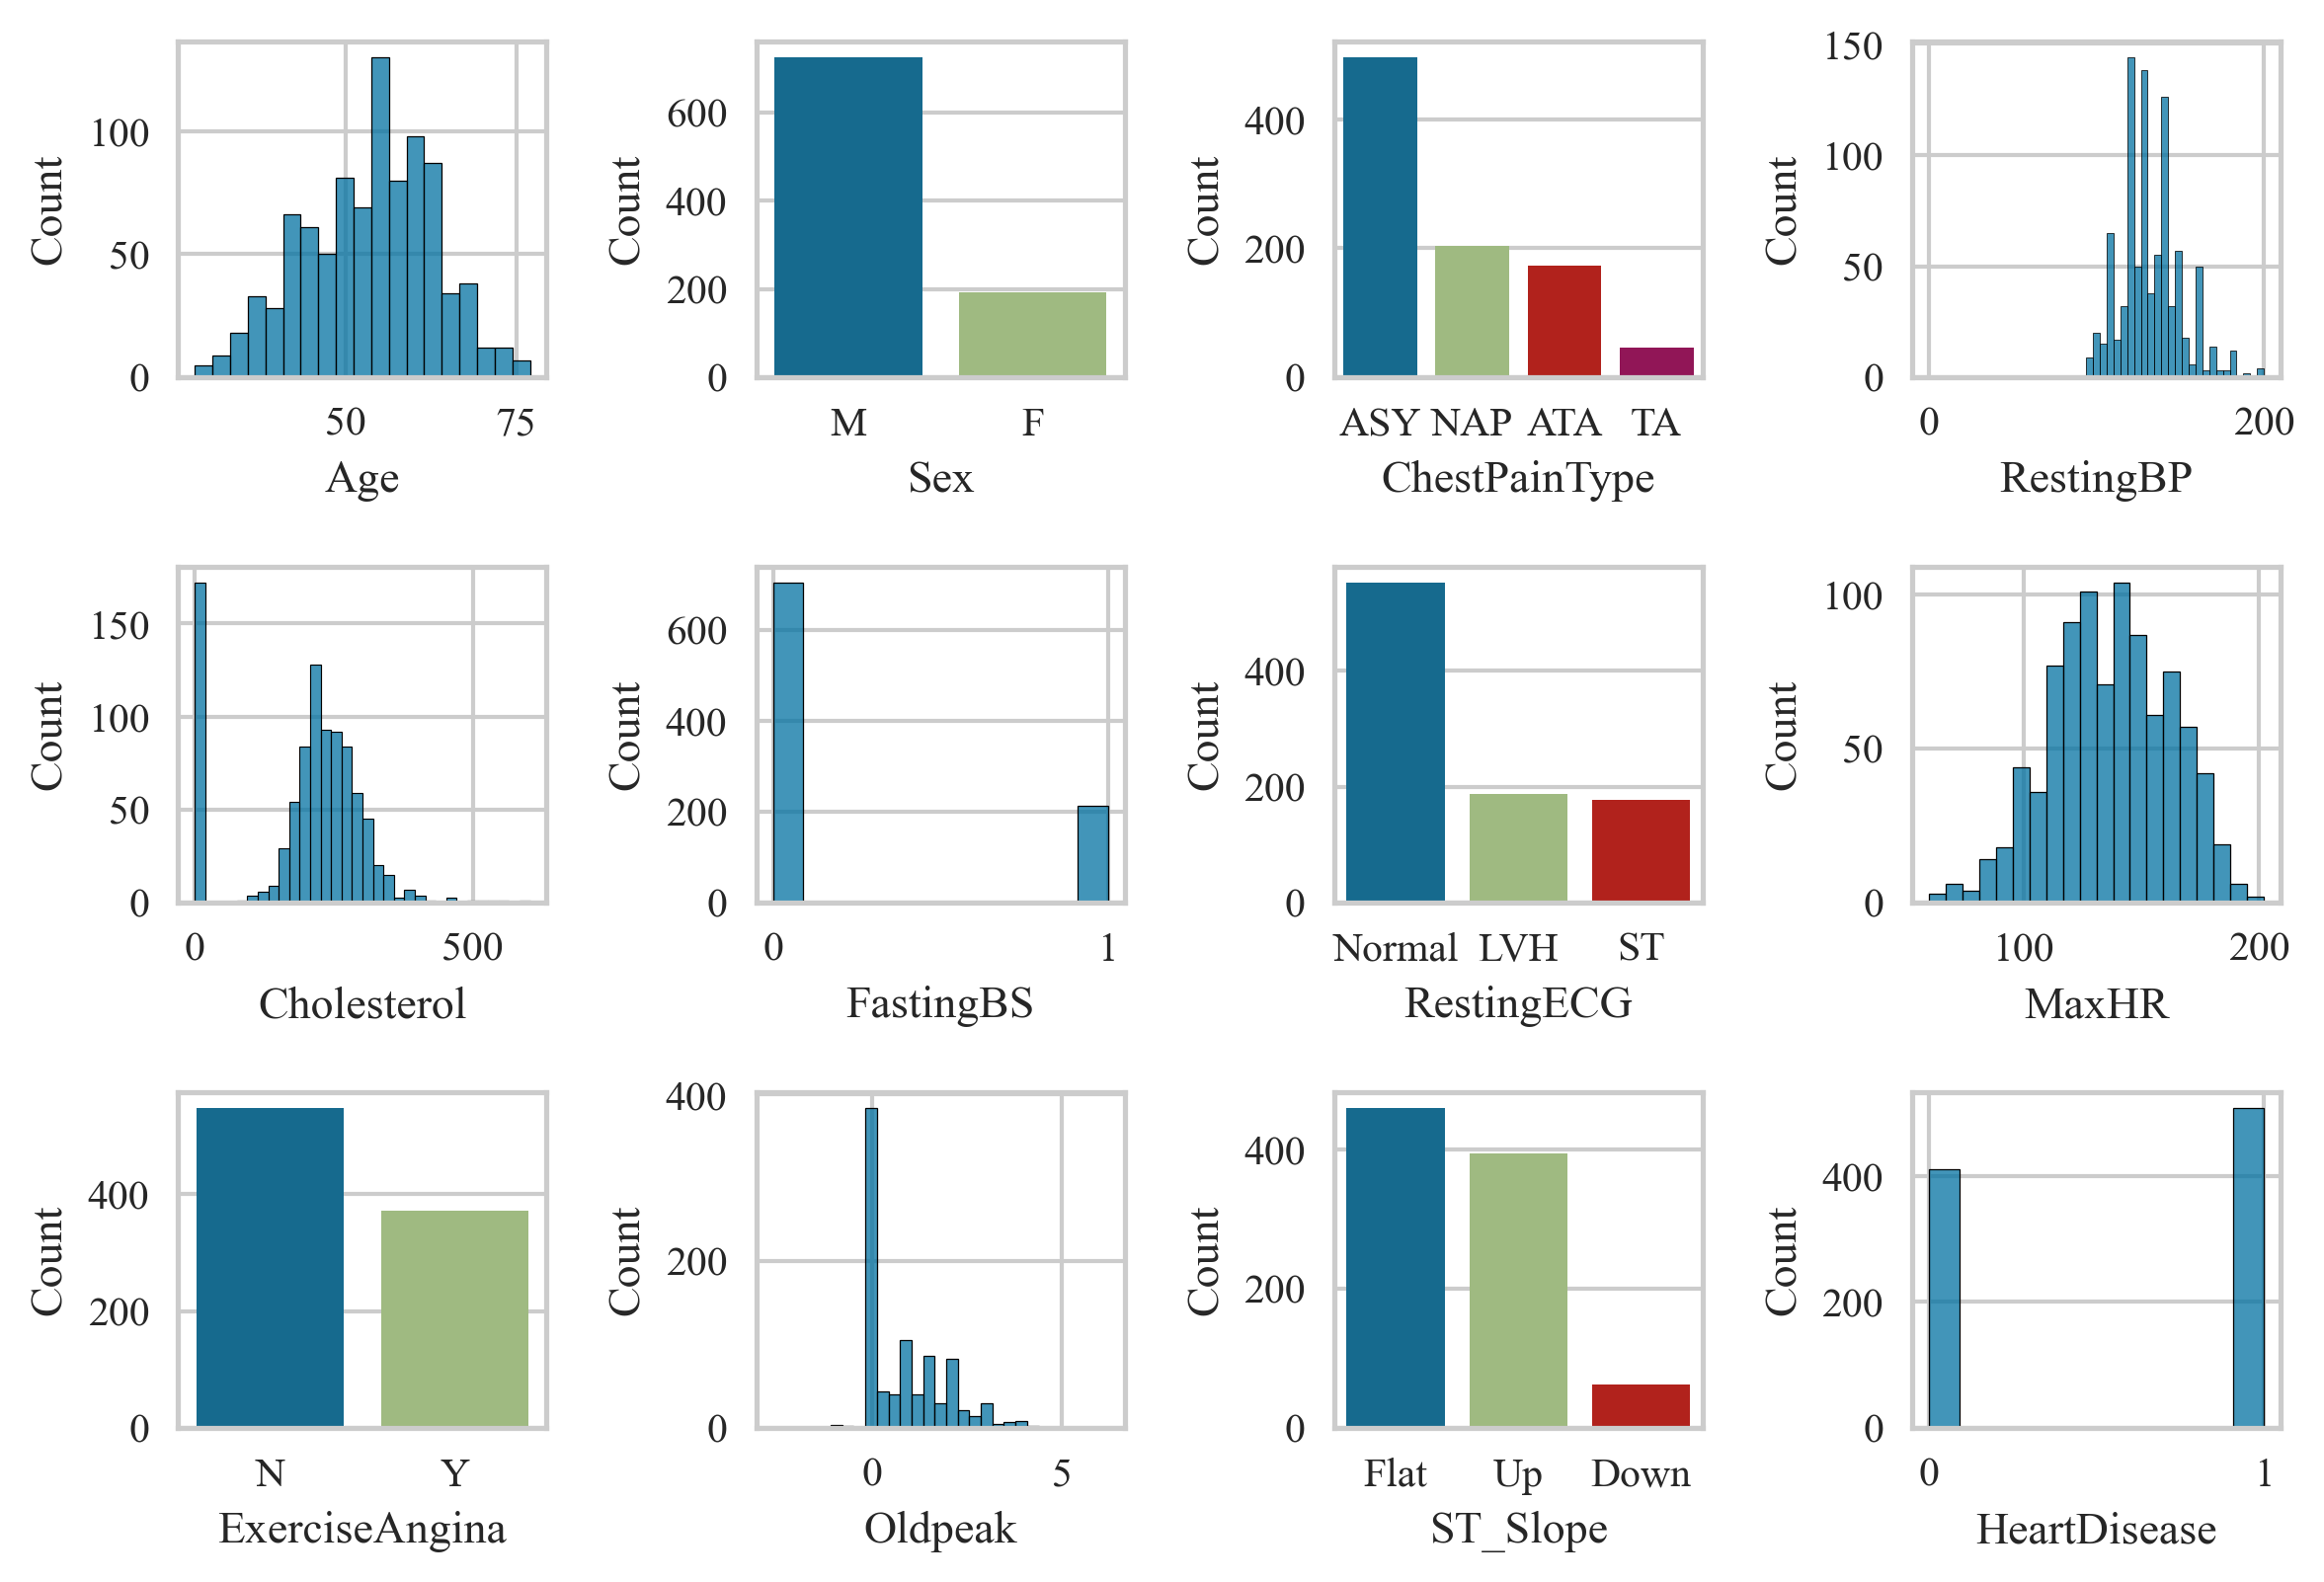

In [6]:
fig, axs = plt.subplots(3,4,dpi=300)
for i,ax in enumerate(axs.flatten()):
    col = df.columns[i]
    if df[col].dtype in ['int32', 'int64', 'float32', 'float64']:
        sns.histplot(df[col], ax=ax)
    else:
        data = df[col].value_counts()
        sns.barplot(data.index,data.values,ax=ax)
        ax.set_ylabel('Count')
        ax.set_xlabel(col)
plt.tight_layout()

<AxesSubplot:>

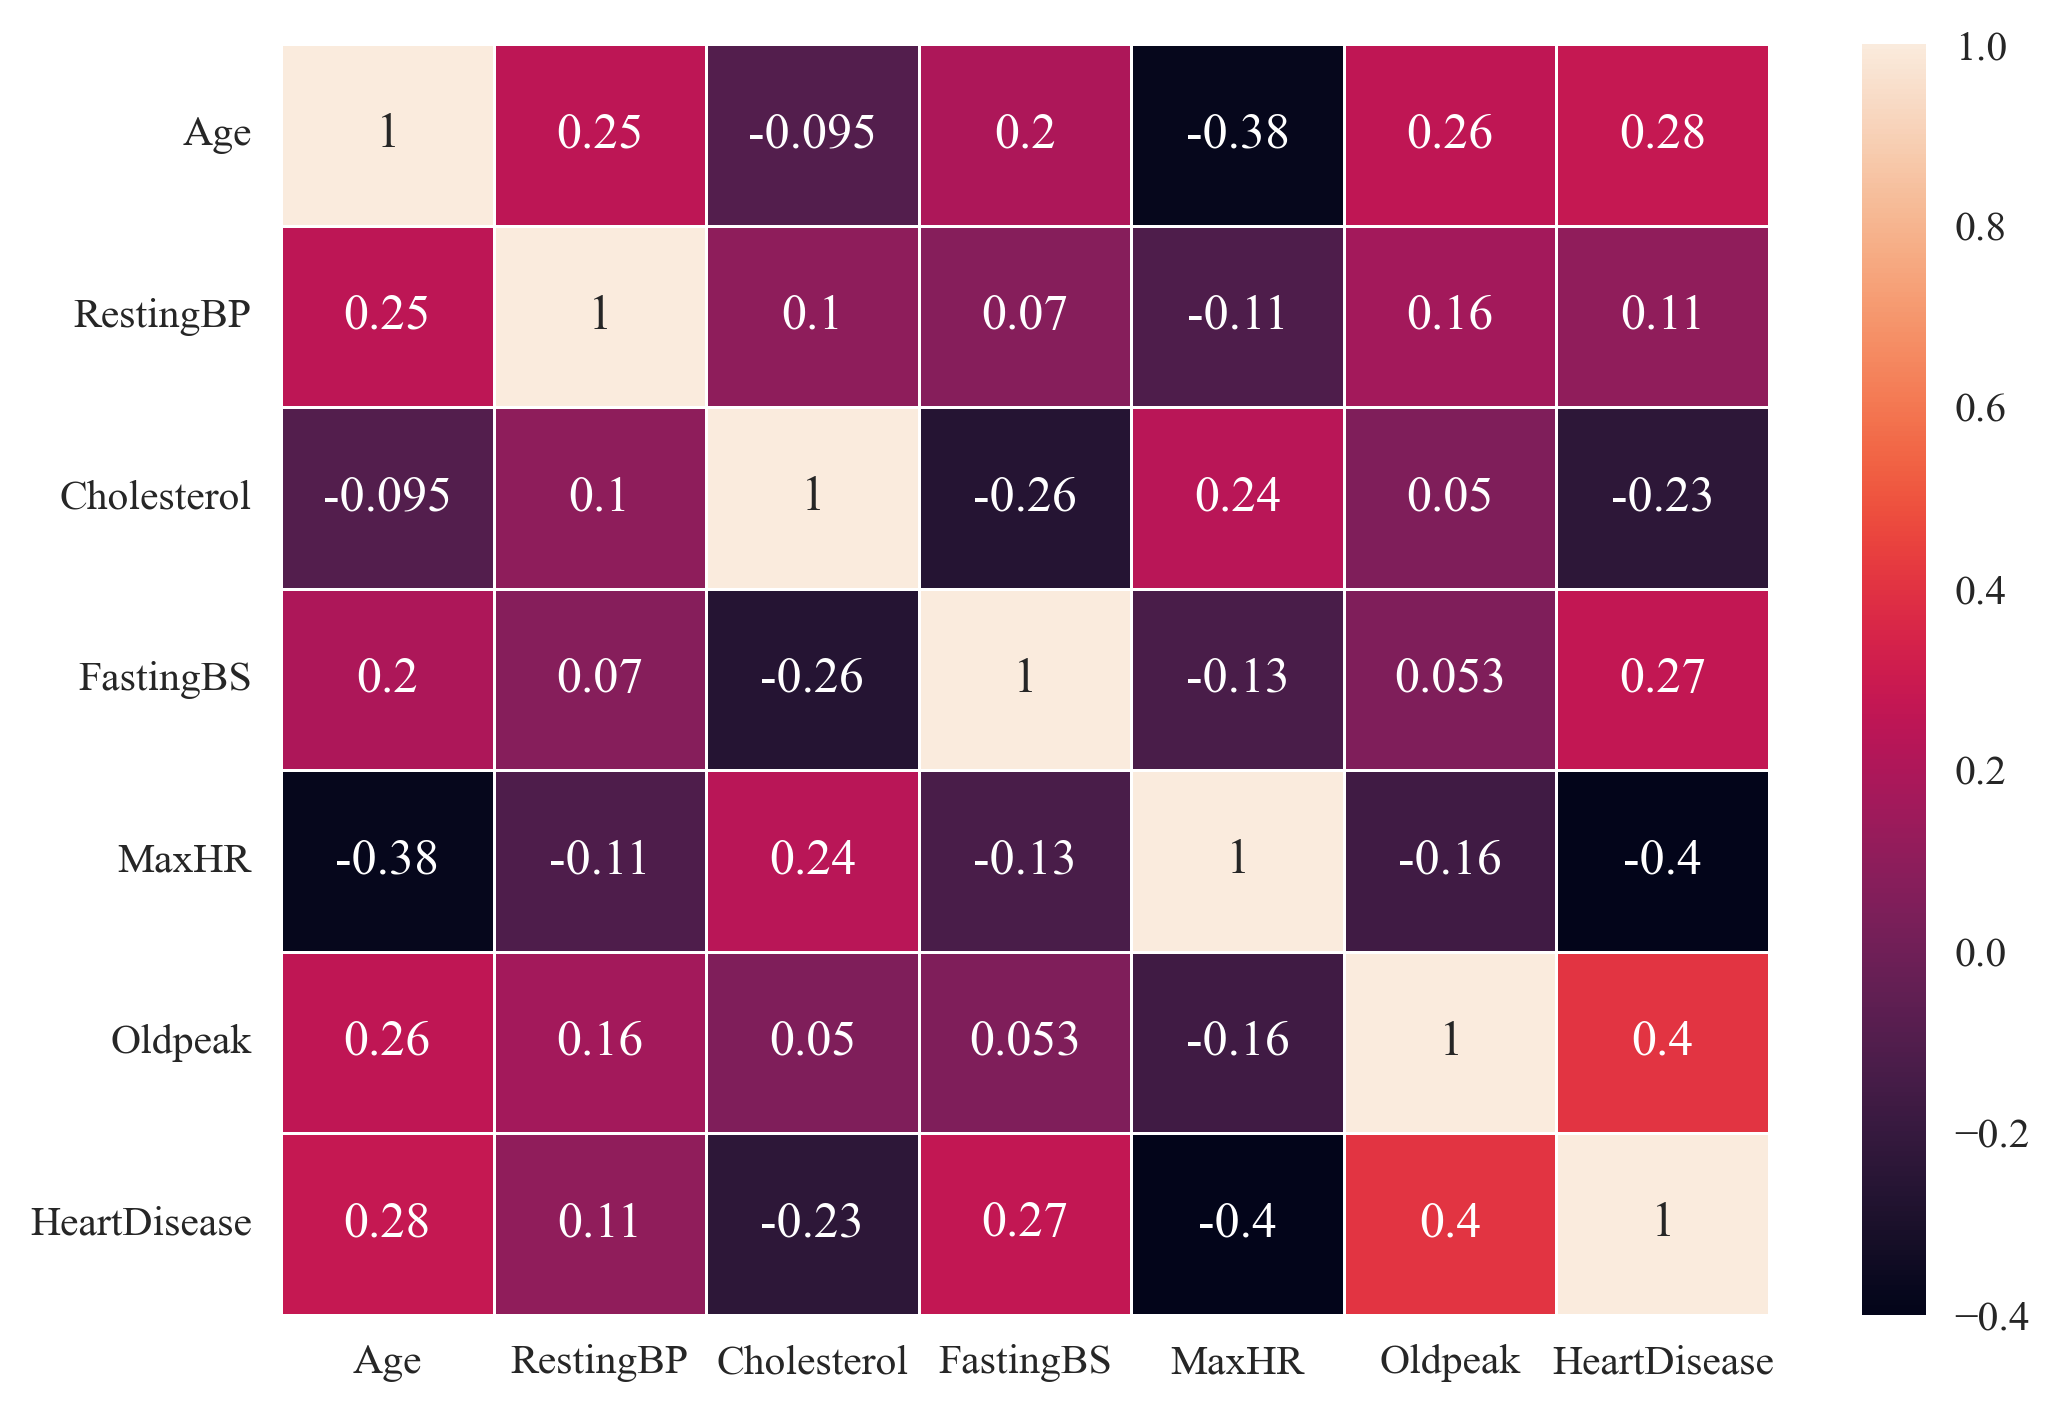

In [7]:
plt.figure(dpi=300)
sns.heatmap(df.corr(),linewidths=0.3,annot=True)

<h2 align='center'><strong>
Encoding of Categorical and Binery Features
</h2>

In [8]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [9]:
encoder = OneHotEncoder()

chestpain = encoder.fit_transform(df['ChestPainType'].values.reshape(-1,1)).toarray()
chestpain = pd.DataFrame(chestpain, columns = ['ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'])

df = pd.concat([df, chestpain], axis = 1)
df.drop(['ChestPainType'], axis = 1, inplace = True)

restingecg = encoder.fit_transform(df['RestingECG'].values.reshape(-1,1)).toarray()
restingecg = pd.DataFrame(restingecg, columns = ['RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST'])

df = pd.concat([df, restingecg], axis = 1)
df.drop(['RestingECG'], axis = 1, inplace = True)

stslope = encoder.fit_transform(df['ST_Slope'].values.reshape(-1,1)).toarray()
stslope = pd.DataFrame(stslope, columns = ['ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'])

df = pd.concat([df, stslope], axis = 1)
df.drop(['ST_Slope'], axis = 1, inplace = True)

df.insert(18, 'Heart Desease', df.pop('HeartDisease'))
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heart Desease
0,40,1,140,289,0,172,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,0,160,180,0,156,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,1,130,283,0,98,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,0,138,214,0,108,1,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,54,1,150,195,0,122,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
914,68,1,144,193,1,141,0,3.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,57,1,130,131,0,115,1,1.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
916,57,0,130,236,0,174,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


<AxesSubplot:>

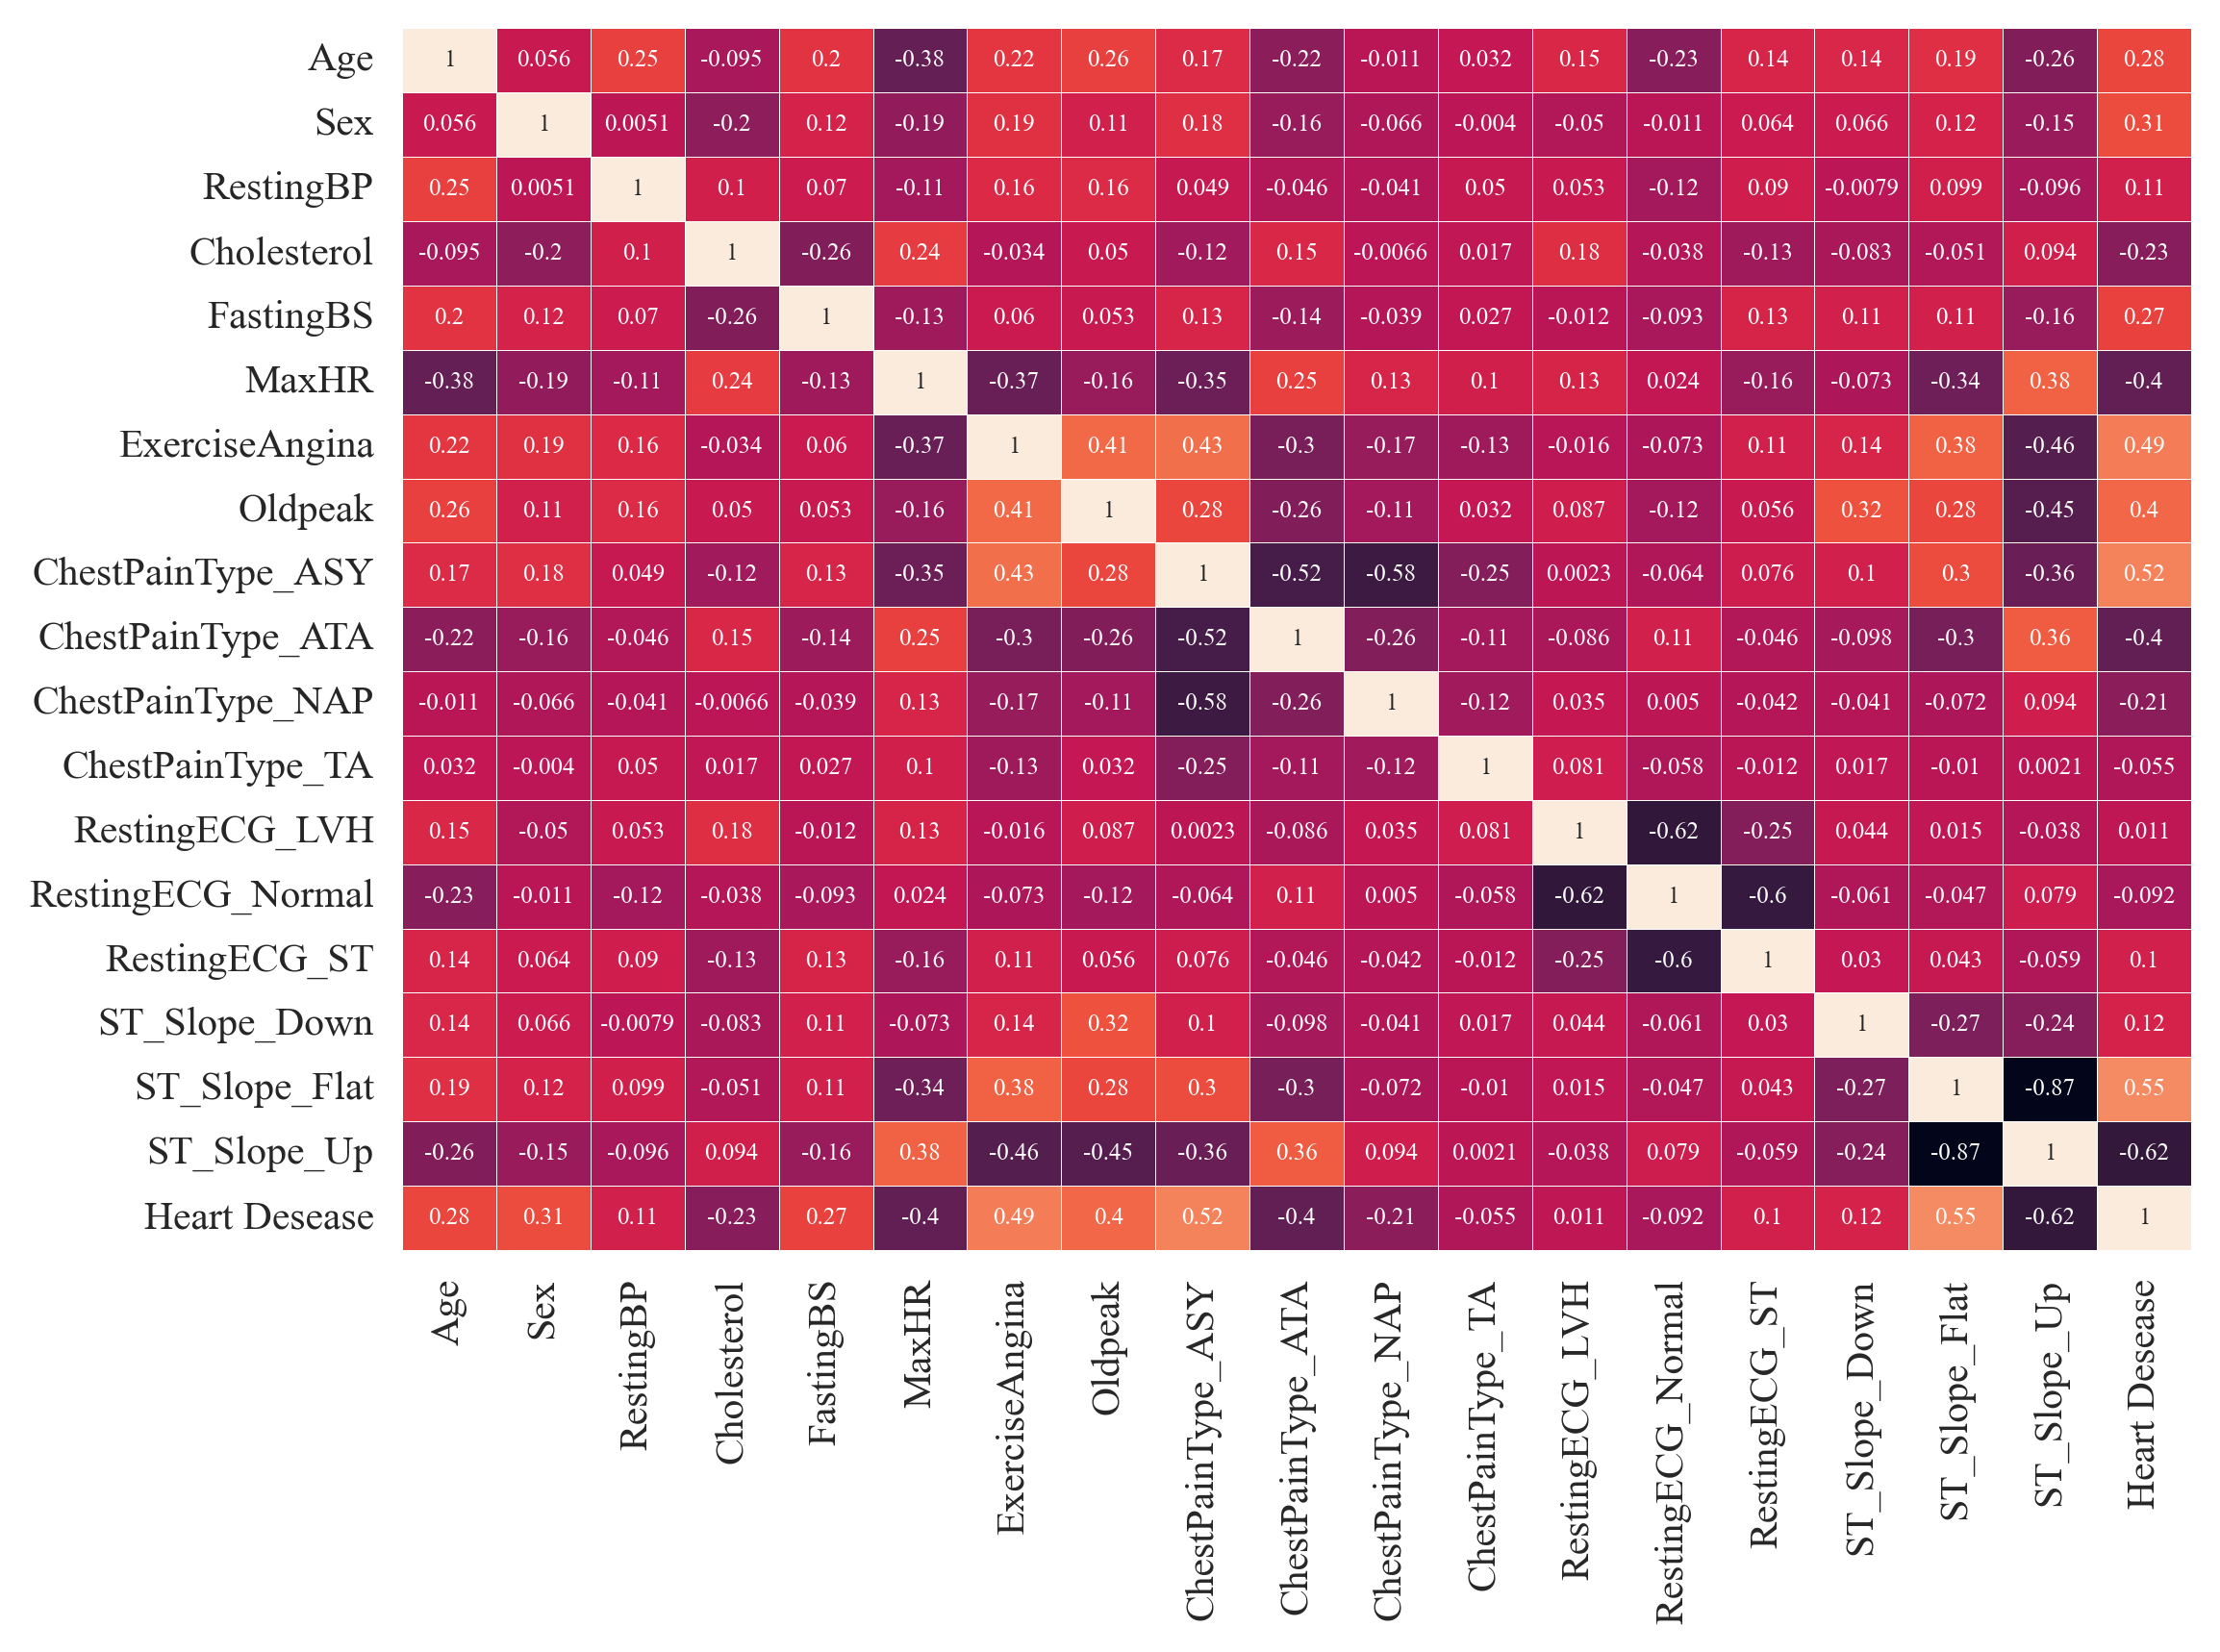

In [10]:
plt.figure(dpi=300)
sns.heatmap(df.corr(),cbar=False,annot=True,annot_kws={'size':6},linewidths=0.2)

In [11]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heart Desease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2 align='center'><strong>
Preparation of Data for ML Pipeline
</h2>

In [12]:
X = df.drop(columns='Heart Desease')
y = df['Heart Desease']

In [13]:
scaler = MinMaxScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1.0,0.70,0.479270,0.0,0.788732,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.0,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,1.0,0.65,0.469320,0.0,0.267606,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.0,0.69,0.354892,0.0,0.338028,1.0,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.530612,1.0,0.75,0.323383,0.0,0.436620,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,0.55,0.437811,0.0,0.507042,0.0,0.431818,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,1.0,0.72,0.320066,1.0,0.570423,0.0,0.681818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,1.0,0.65,0.217247,0.0,0.387324,1.0,0.431818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,0.591837,0.0,0.65,0.391376,0.0,0.802817,0.0,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<h2 align='center'><strong>
Classification Algorithms before PCA Implimentation
</h2>

In [14]:
setup(data=df,target='Heart Desease',session_id=2800)
classifiers = compare_models()
classifiers.fit(scaled_X,y)

,Description,Value
0,Session id,2800
1,Target,Heart Desease
2,Target type,Binary
3,Original data shape,"(918, 19)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(642, 19)"
6,Transformed test set shape,"(276, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8613,0.9208,0.8981,0.8610,0.8771,0.7178,0.7236,0.0820
gbc,Gradient Boosting Classifier,0.8551,0.9196,0.8844,0.8632,0.8711,0.7056,0.7115,0.0380
lightgbm,Light Gradient Boosting Machine,0.8551,0.9148,0.8840,0.8611,0.8703,0.7058,0.7111,0.0250
ridge,Ridge Classifier,0.8534,0.0000,0.8840,0.8599,0.8695,0.7021,0.7079,0.0080
lda,Linear Discriminant Analysis,0.8534,0.9127,0.8840,0.8599,0.8695,0.7021,0.7079,0.0090
et,Extra Trees Classifier,0.8519,0.9172,0.8783,0.8618,0.8671,0.6994,0.7057,0.0710
lr,Logistic Regression,0.8456,0.9116,0.8783,0.8527,0.8627,0.6861,0.6925,0.9040
nb,Naive Bayes,0.8456,0.9012,0.8698,0.8588,0.8613,0.6865,0.6930,0.0100
ada,Ada Boost Classifier,0.8363,0.8867,0.8533,0.8550,0.8517,0.6688,0.6734,0.0310
dt,Decision Tree Classifier,0.7772,0.7747,0.7940,0.8043,0.7971,0.5491,0.5525,0.0080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2800, verbose=0, warm_start=False)

<h2 align='center'><strong>
Principle Component Analysis
</h2>

In [15]:
pca = PCA()
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)
pca.explained_variance_ratio_.sum()

0.9999999999999998

Text(0, 0.5, 'Explained Variance')

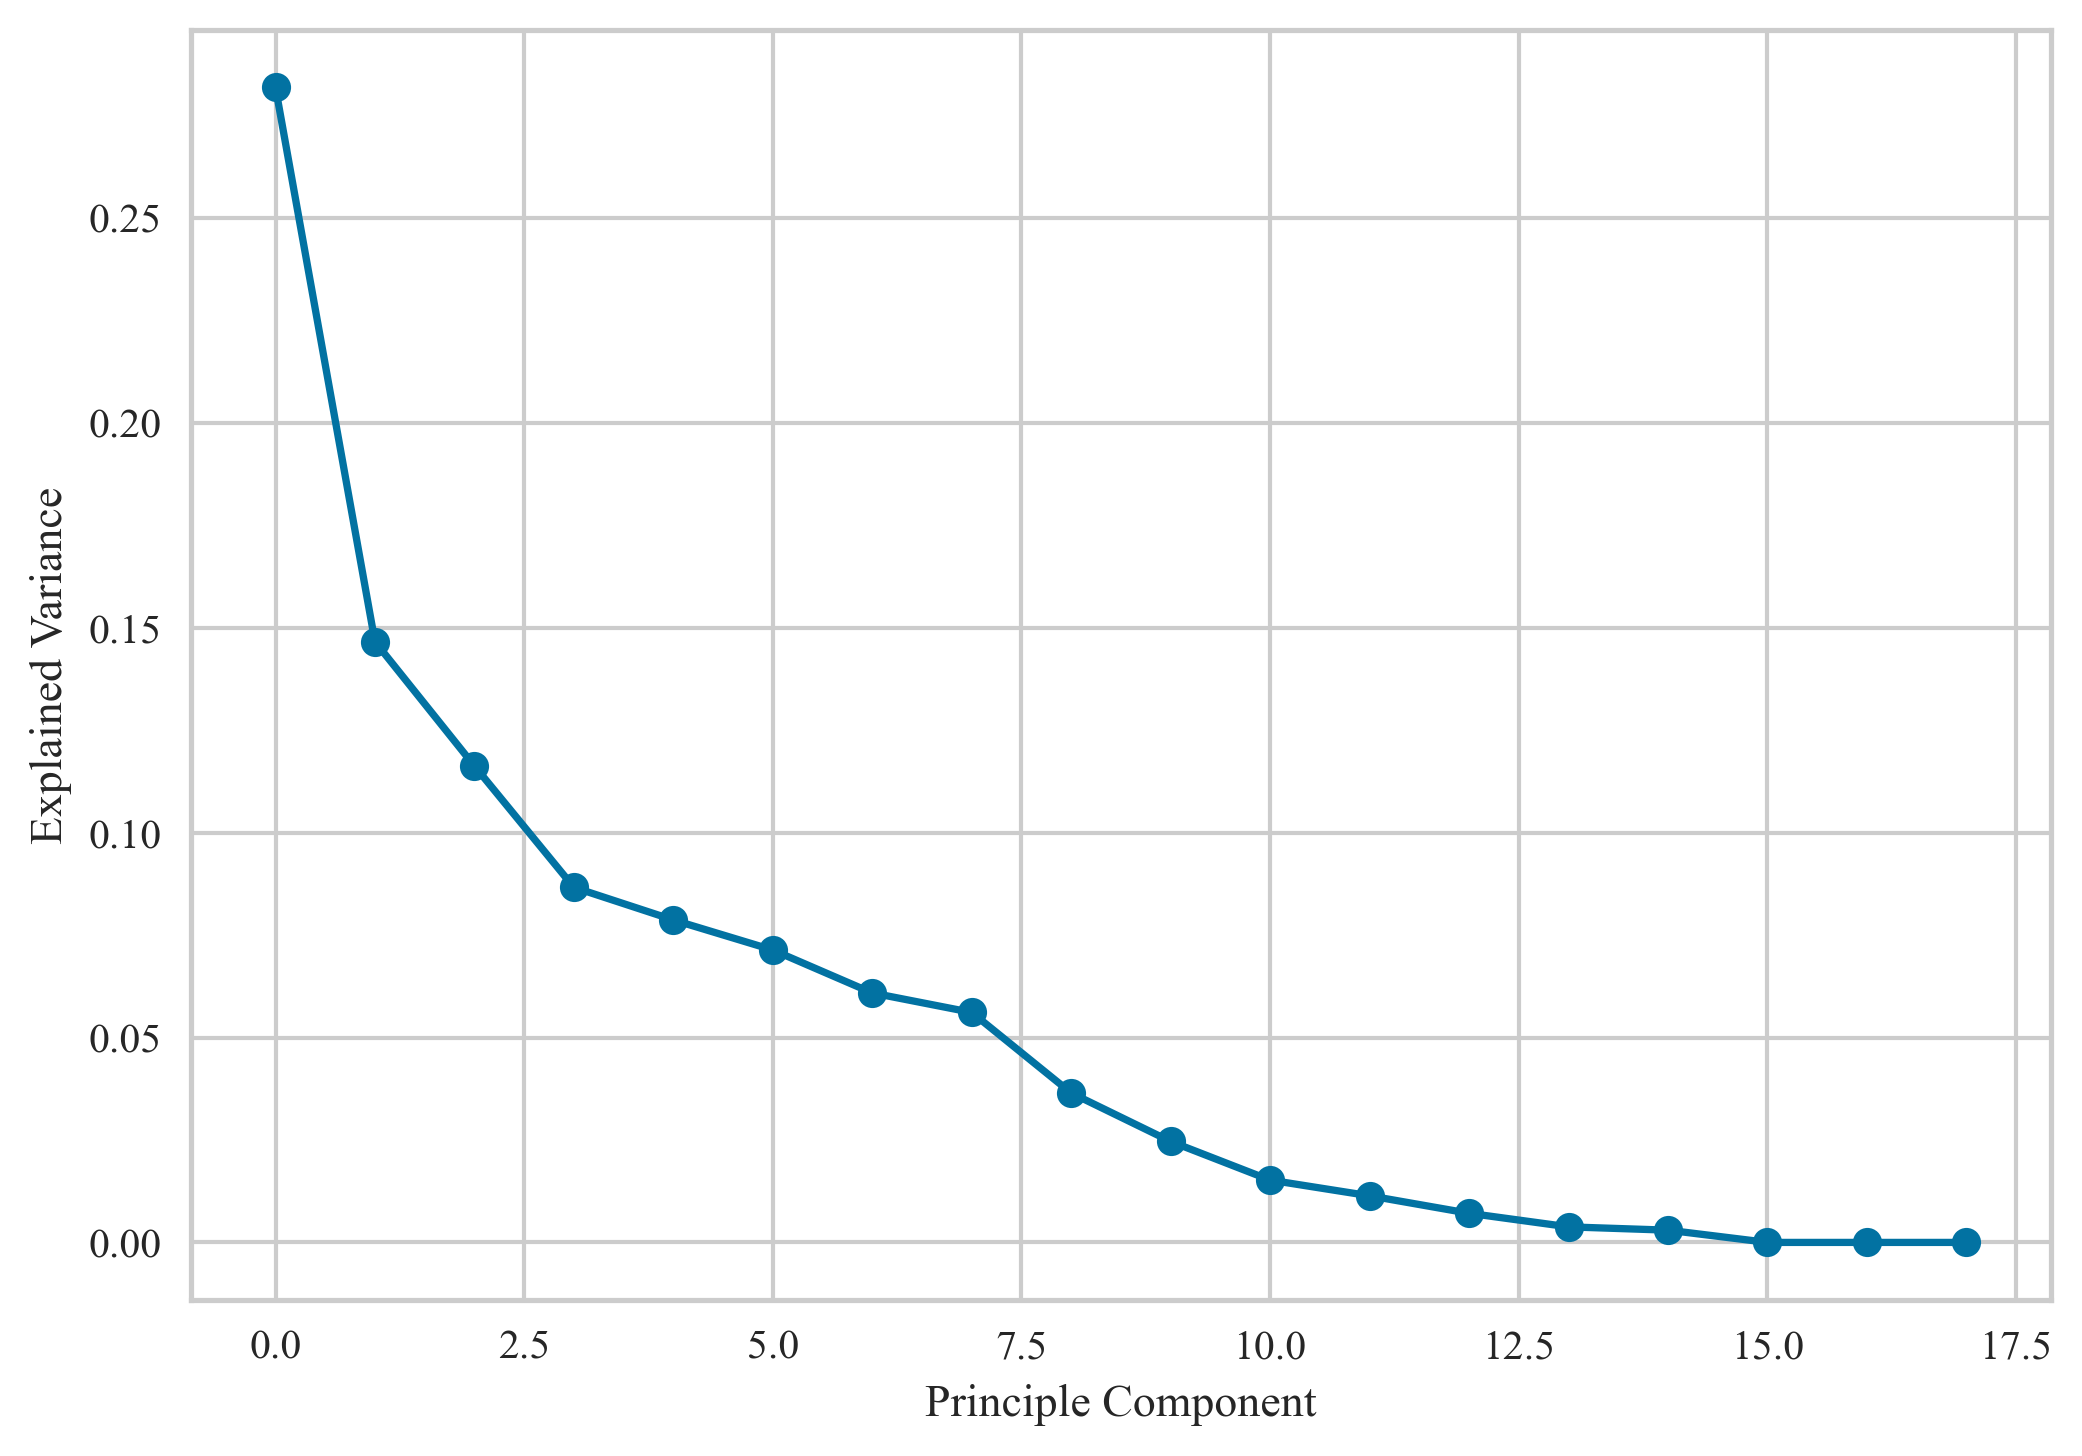

In [16]:
plt.figure(dpi=300)
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.xlabel('Principle Component')
plt.ylabel('Explained Variance')

In [17]:
pca = PCA(n_components=5)
pca.fit(scaled_X)
pca_X = pca.transform(scaled_X)
pca.explained_variance_ratio_.sum()

0.7100683549996035

In [27]:
pca.components_.round(2)

array([[-0.08, -0.14, -0.02,  0.03, -0.12,  0.11, -0.41, -0.07, -0.42,
         0.26,  0.14,  0.02, -0.03,  0.12, -0.09, -0.03, -0.48,  0.51],
       [ 0.07, -0.03,  0.02,  0.02,  0.08,  0.02, -0.05,  0.01, -0.07,
        -0.04,  0.07,  0.03,  0.44, -0.79,  0.36,  0.03, -0.12,  0.08],
       [ 0.01, -0.11,  0.  ,  0.02, -0.04,  0.02, -0.12,  0.  , -0.56,
        -0.04,  0.55,  0.05,  0.1 ,  0.01, -0.12, -0.08,  0.43, -0.36],
       [ 0.03,  0.29,  0.  , -0.14,  0.44, -0.06,  0.03, -0.01, -0.16,
        -0.07,  0.25, -0.01, -0.56,  0.02,  0.53,  0.04, -0.08,  0.04],
       [-0.04, -0.27,  0.01,  0.05, -0.17, -0.  , -0.1 , -0.02, -0.16,
         0.58, -0.44,  0.02, -0.25, -0.1 ,  0.35, -0.13,  0.29, -0.17]])

In [28]:
pca_components = pd.DataFrame(pca.components_,columns=X.columns,index=[f'PC{i+1}' for i in range(len(pca.components_))])
pca_components

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
PC1,-0.075027,-0.138448,-0.015899,0.031363,-0.121483,0.106944,-0.408077,-0.068523,-0.421668,0.257623,0.144193,0.019851,-0.030931,0.118569,-0.087638,-0.030849,-0.478066,0.508916
PC2,0.066599,-0.031694,0.015217,0.016255,0.082737,0.022594,-0.054500,0.007349,-0.067955,-0.037391,0.071929,0.033417,0.435200,-0.794787,0.359588,0.033580,-0.115017,0.081437
PC3,0.012021,-0.114457,0.001373,0.024394,-0.042413,0.022673,-0.120091,0.003332,-0.559745,-0.040619,0.552955,0.047409,0.103511,0.013492,-0.117004,-0.076644,0.433950,-0.357306
PC4,0.028881,0.285259,0.003828,-0.137572,0.441554,-0.064201,0.025460,-0.013989,-0.164597,-0.069988,0.245592,-0.011007,-0.557610,0.023304,0.534306,0.041580,-0.079701,0.038121
PC5,-0.040694,-0.268233,0.007254,0.047241,-0.174193,-0.000699,-0.098716,-0.017096,-0.157036,0.581974,-0.443181,0.018243,-0.248418,-0.099940,0.348358,-0.126451,0.294090,-0.167639


<AxesSubplot:>

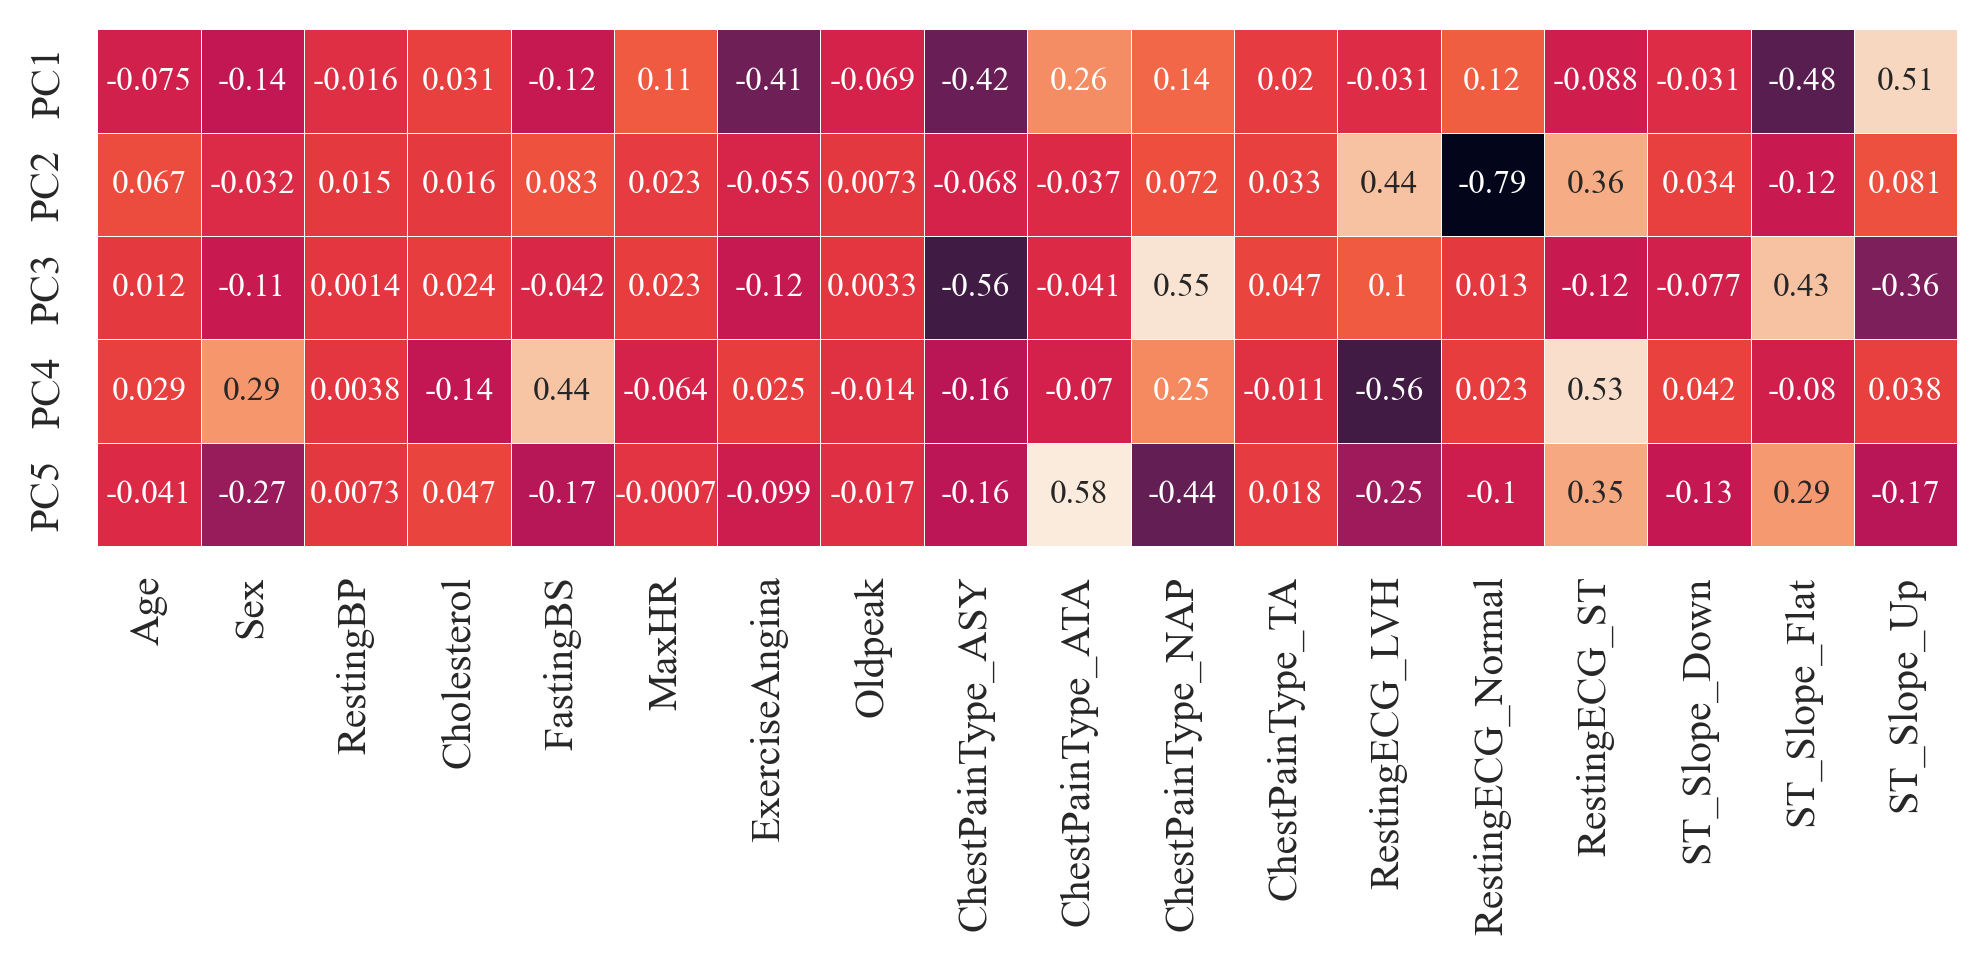

In [33]:
plt.figure(dpi=300)    
sns.heatmap(pca_components,cbar=False, square=True,annot=True,linewidths=0.2,annot_kws={'size':8})

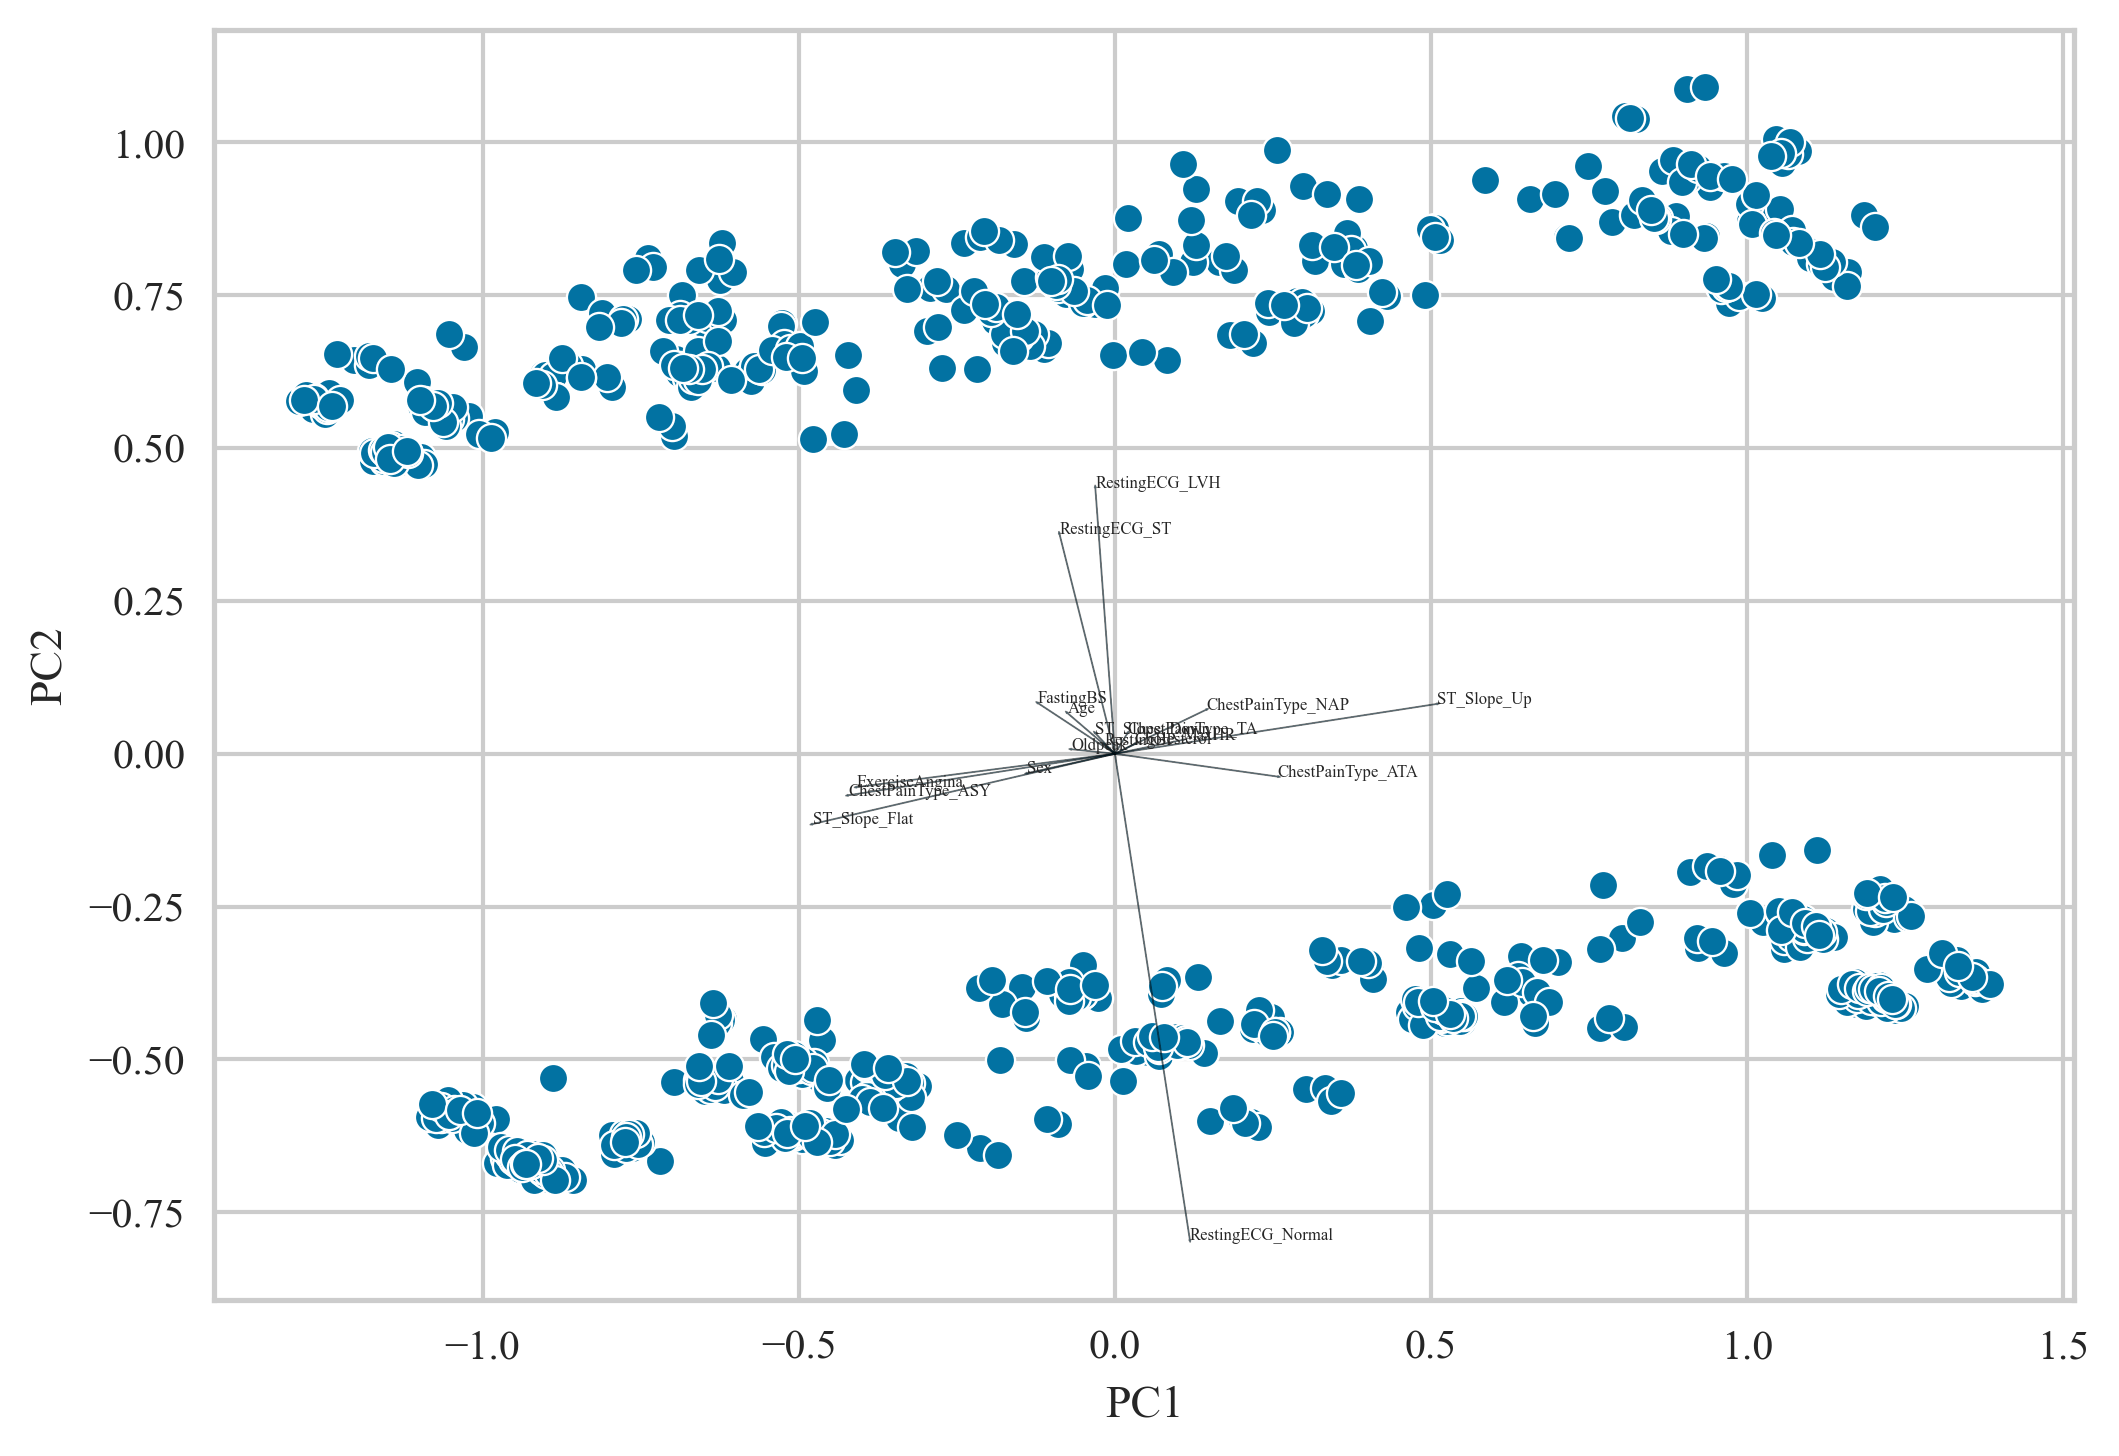

In [19]:
plt.figure(dpi=300)
sns.scatterplot(x=pca_X[:, 0], y=pca_X[:, 1])
for i, var in enumerate(pca.components_.T):
    plt.arrow(0, 0, var[0], var[1], alpha=0.5)
    plt.text(var[0], var[1], X.columns[i],size=4)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

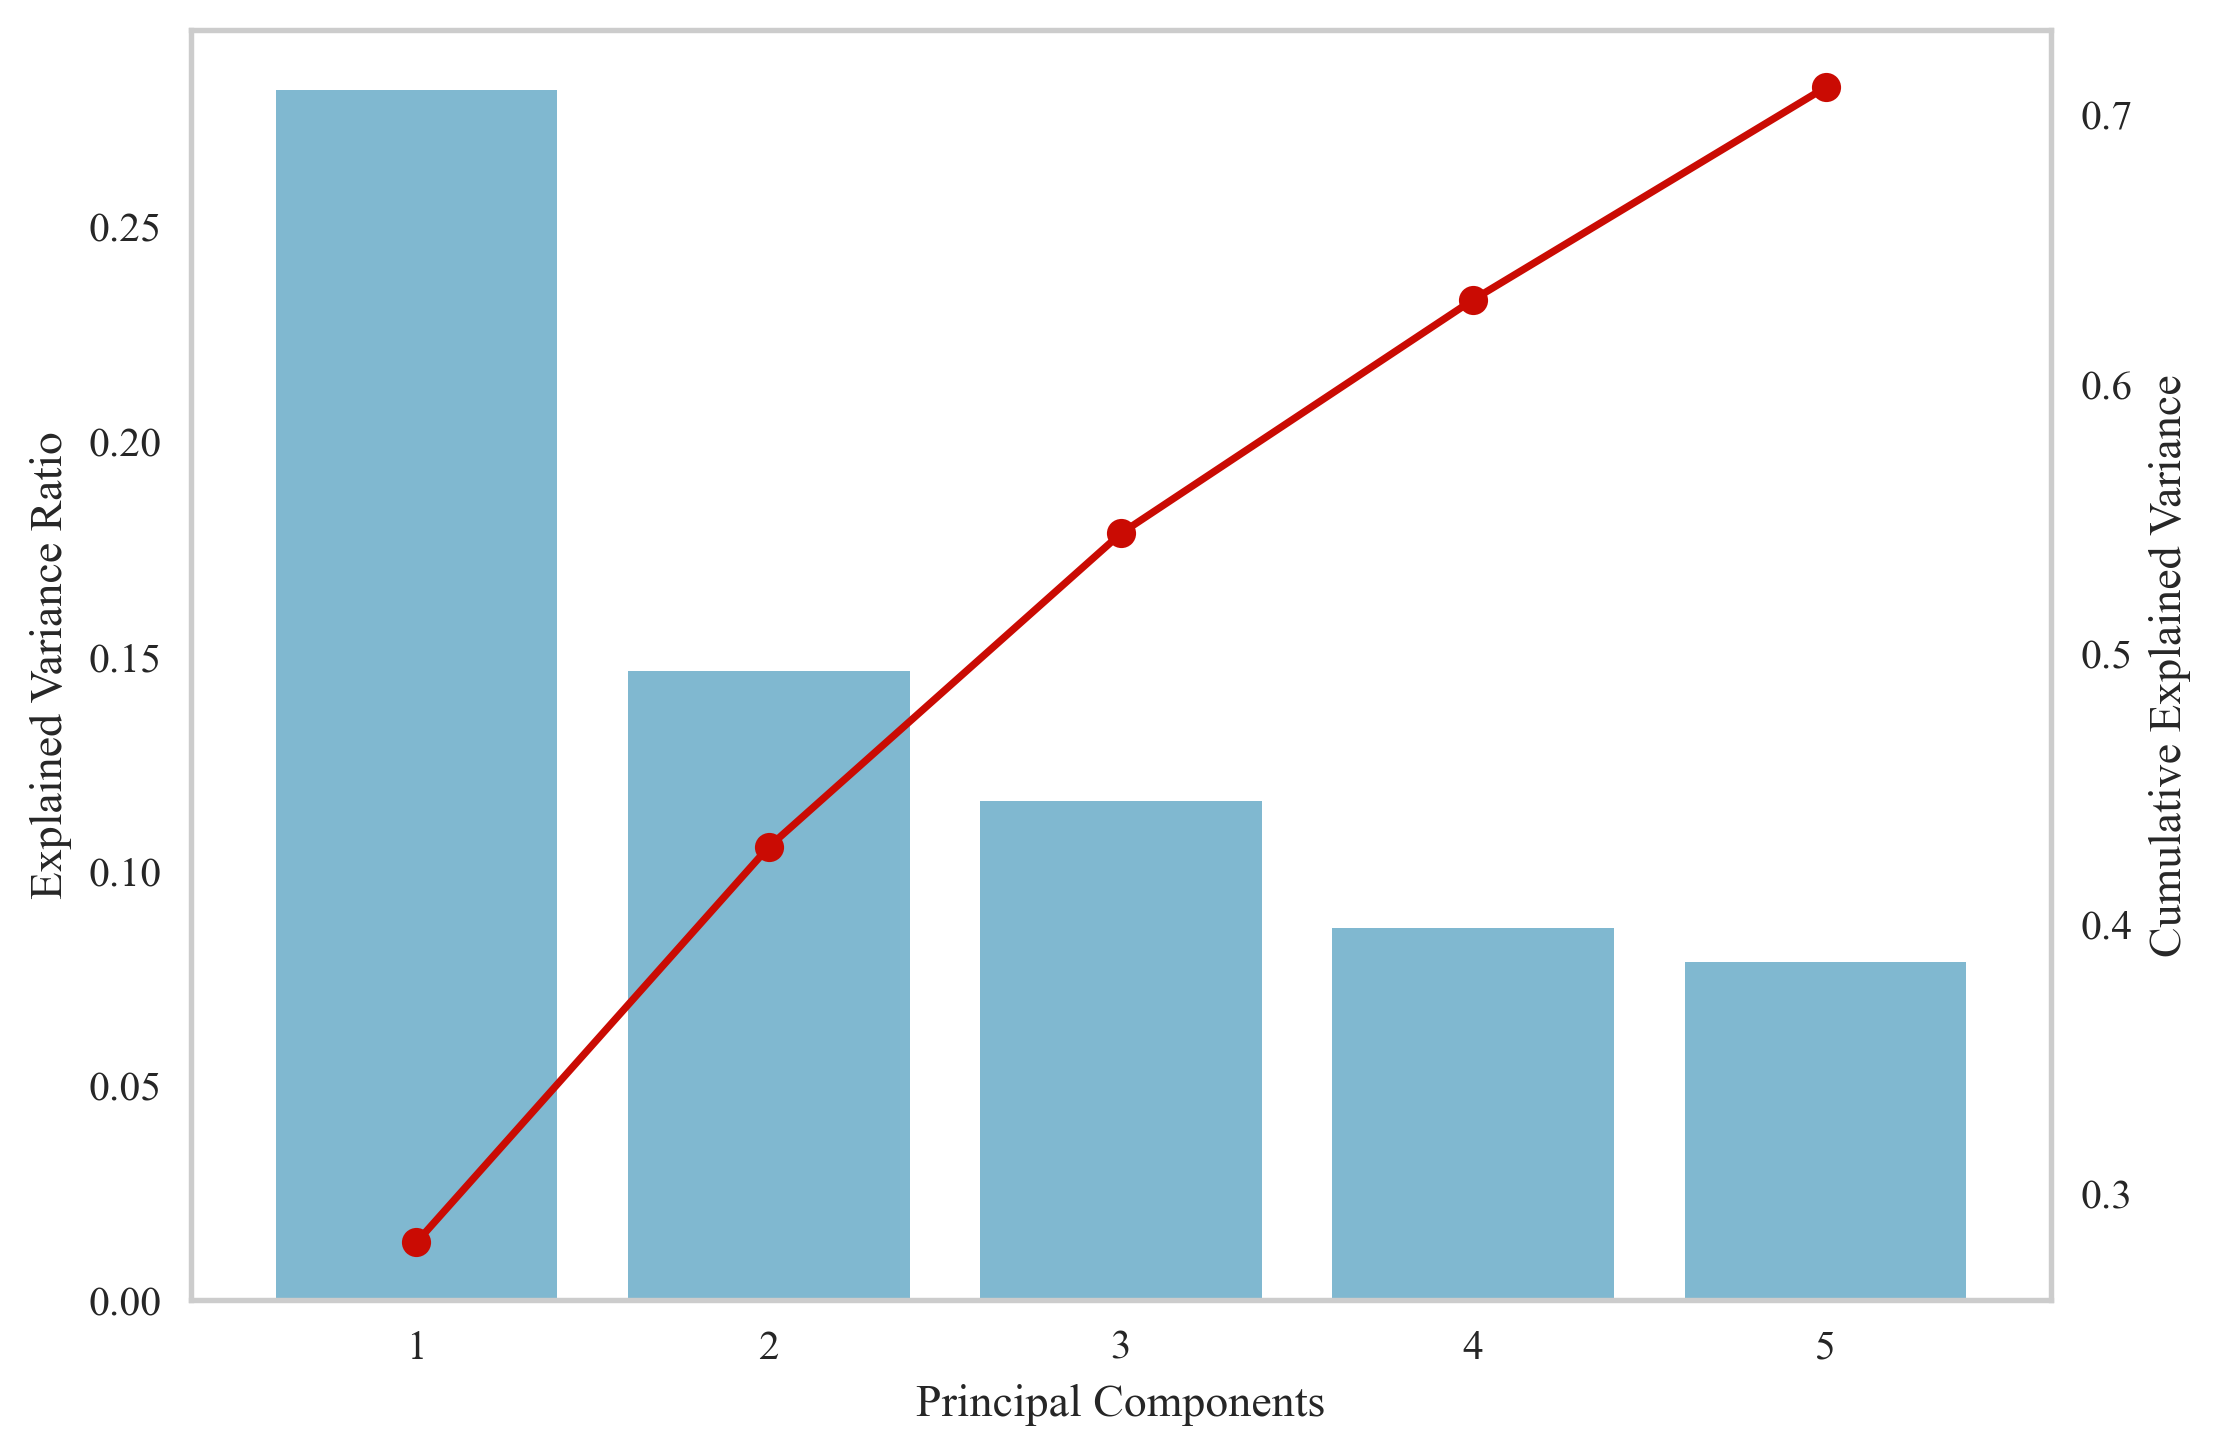

In [35]:
explained_variance_ratios = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratios)

fig, ax1 = plt.subplots(dpi=300)
ax1.bar(range(1,len(explained_variance_ratios)+1), explained_variance_ratios, alpha=0.5)
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio')
plt.grid(None)
ax2 = ax1.twinx()
ax2.plot(range(1,len(explained_variance_ratios)+1), cumulative_variance, color='r', marker='o')
ax2.set_ylabel('Cumulative Explained Variance')
plt.grid(None)


plt.show()

In [21]:
new_df = pd.DataFrame(pca_X,columns=['PC1','PC2','PC3','PC4','PC5'])
new_df = pd.concat([new_df,df['Heart Desease']],axis=1)
new_df

,PC1,PC2,PC3,PC4,PC5,Heart Desease
0,1.228550,-0.399629,-0.224040,-0.039083,0.407745,0
1,0.225710,-0.445965,1.271007,-0.090385,0.095400,1
2,0.971687,0.737972,-0.367398,0.504785,0.858066,0
3,-0.783223,-0.649685,0.031720,-0.462974,0.284789,1
4,1.050344,-0.281009,0.361252,0.328992,-0.635792,0
...,...,...,...,...,...,...
913,-0.042244,-0.526798,0.649321,-0.073670,0.296410,1
914,-0.657211,-0.510230,0.005027,0.237132,-0.080811,1
915,-0.931524,-0.671129,-0.082938,-0.156316,0.002838,1
916,0.204031,0.686832,0.773969,-1.002063,0.970586,1


<h2 align='center'><strong>
Classification Algorithms after PCA Implimentation
</h2>

<h3 align='center'><strong>
Pycaret Compare Models
</h3>

In [22]:
setup(data=new_df,target='Heart Desease',session_id=2800)
classifiers = compare_models()
classifiers.fit(pca_X,y)

,Description,Value
0,Session id,2800
1,Target,Heart Desease
2,Target type,Binary
3,Original data shape,"(918, 6)"
4,Transformed data shape,"(918, 6)"
5,Transformed train set shape,"(642, 6)"
6,Transformed test set shape,"(276, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8550,0.9089,0.8838,0.8620,0.8697,0.7056,0.7130,0.0100
ridge,Ridge Classifier,0.8550,0.0000,0.8840,0.8623,0.8698,0.7057,0.7131,0.0090
lda,Linear Discriminant Analysis,0.8550,0.9085,0.8840,0.8623,0.8698,0.7057,0.7131,0.0080
ada,Ada Boost Classifier,0.8519,0.8960,0.8784,0.8635,0.8678,0.6991,0.7064,0.0330
knn,K Neighbors Classifier,0.8456,0.8812,0.8754,0.8537,0.8616,0.6865,0.6925,0.0170
rf,Random Forest Classifier,0.8441,0.8992,0.8644,0.8591,0.8589,0.6843,0.6911,0.0900
nb,Naive Bayes,0.8410,0.9055,0.8643,0.8530,0.8560,0.6780,0.6833,0.0090
et,Extra Trees Classifier,0.8395,0.8865,0.8642,0.8512,0.8548,0.6748,0.6812,0.0650
lightgbm,Light Gradient Boosting Machine,0.8380,0.9003,0.8614,0.8499,0.8525,0.6724,0.6793,0.0210
qda,Quadratic Discriminant Analysis,0.8379,0.9034,0.8559,0.8578,0.8531,0.6715,0.6791,0.0120


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2800, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2 align='center'><strong>
Model Tuning
</h2>

In [36]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=0.2,random_state=1)

<h3 align='center'><strong>
Logistic Regression
</h3>

In [40]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"MCC: {matthews_corrcoef(y_test, y_pred)}")

Accuracy: 0.9130434782608695
Precision: 0.9351851851851852
Recall: 0.9181818181818182
F1 Score: 0.9266055045871558
MCC: 0.8201685828263917


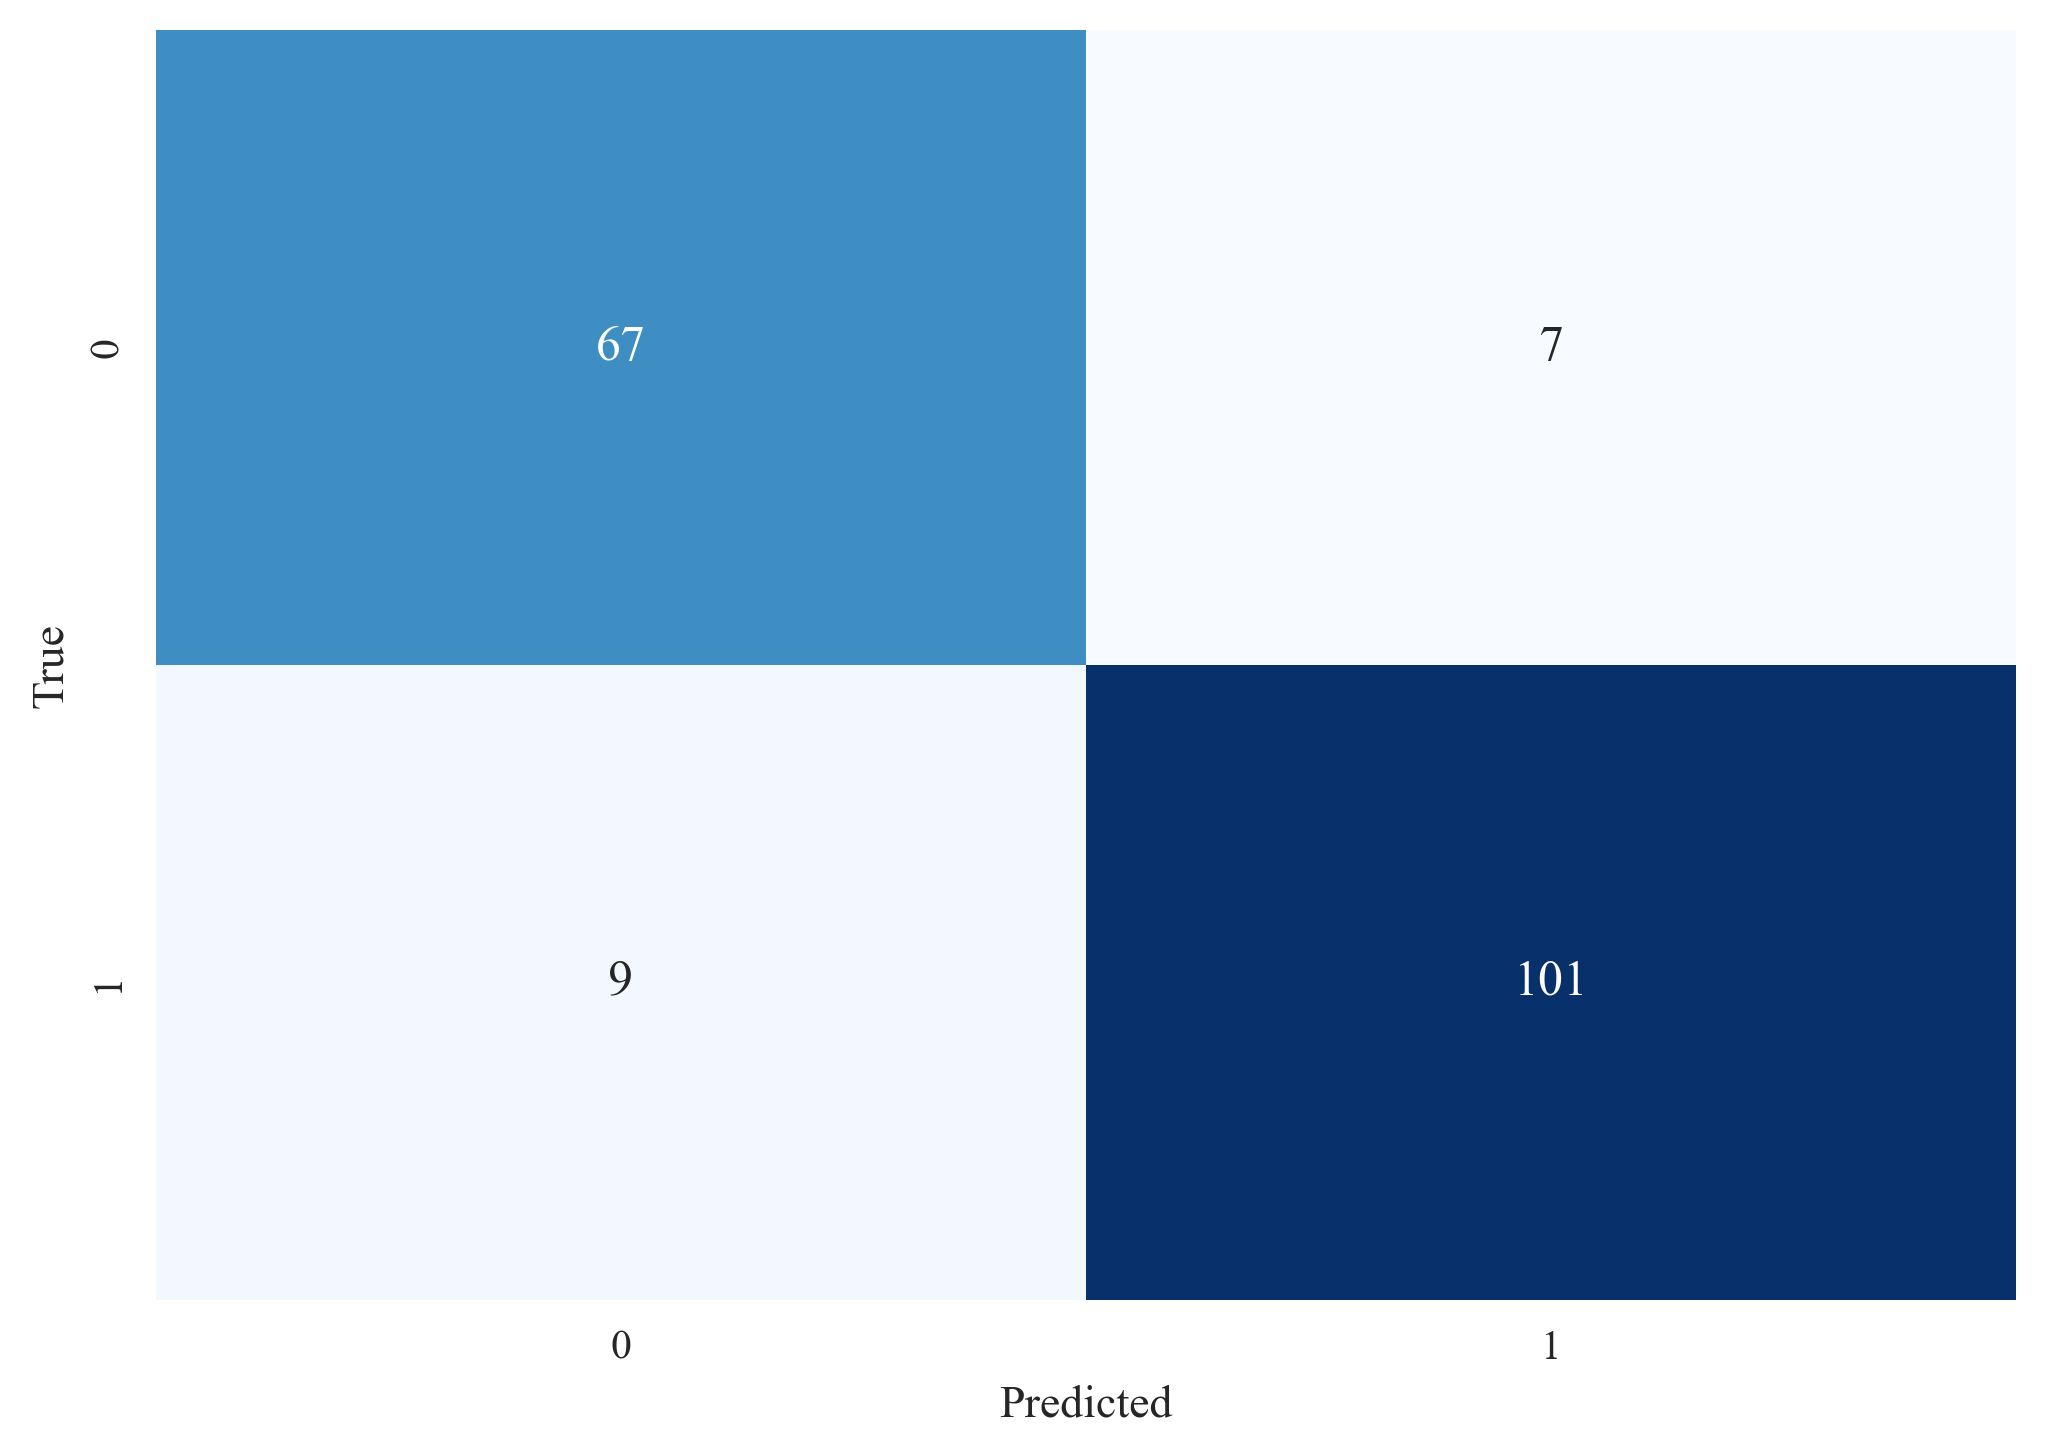

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()